# Определение перспективного тарифа для телеком компании


Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
*Тариф «Смарт»*
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора 3 рубля, сообщение 3 рубля, 1 Гб интернет-трафика 200 рублей

*Тариф «Ультра»*
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: минута разговора 1 рубль, сообщение 1 рубль, 1 Гб интернет-трафика 150 рублей


## Открытие данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv') 
tariffs = pd.read_csv('/datasets/tariffs.csv') 
users = pd.read_csv('/datasets/users.csv') 

Итак, мы загрузили 5 файлов, посмотрим, что за данные в каждом из них.

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Тут какой-то странный столбец Unnamed:0, похоже на задвоившийся индекс. Удаляем его сразу.

In [7]:
internet.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В этой таблице всего 2 строки с тарифами "Смарт" и "Ультра". Все данные, кроме названий тарифов, уже приведены к целочисленным значениям, и это прекрасно.

In [12]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- Проверим на дубликаты

In [14]:
calls.duplicated().sum()

0

In [15]:
messages.duplicated().sum()

0

In [16]:
internet.duplicated().sum()

0

In [17]:
users.duplicated().sum()

0

**Вывод**

- Как и говорилось в описании проекта, у нас есть данные по 500 пользователей. Из них 38 в течение 2018 года прекратили пользоваться тарифами Смарт и Ультра: будем иметь это в виду при группировке по месяцам.
- Насколько можно судить по вызову info(), пропусков, кроме `churn_date`, в данных нет.
- Даты во всех таблицах записаны в текстовом формате, это нужно будет поправить.
- В таблице `calls` длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. Оставим их как есть, на суммарную выручку это не повлияет.
- Проверили, что нет дубликатов ни в одном из датасетов. Можно приступать.

## Подготовка данных

- Приведем даты во всех таблицах к нужному типу.

In [18]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

- Быстро проверим на аномальные значения (например, отрицательные) методом describe()

In [19]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [20]:
internet.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [21]:
internet.query('mb_used == 0').sample(10)

,id,mb_used,session_date,user_id
41555,1145_291,0.0,2018-05-14,1145
29310,1102_184,0.0,2018-08-11,1102
97344,1327_265,0.0,2018-08-26,1327
100827,1338_217,0.0,2018-12-02,1338
9607,1032_687,0.0,2018-05-02,1032
17591,1060_85,0.0,2018-12-16,1060
71202,1241_106,0.0,2018-12-28,1241
74694,1251_256,0.0,2018-03-20,1251
3349,1011_216,0.0,2018-11-03,1011
114711,1386_164,0.0,2018-10-26,1386


In [22]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [23]:
users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


- Все в порядке. Пробежавшись по min и max, видим, что есть минимальные значения равные 0, но отрицательных или каких-то неправдоподобно больших значений нет.

- Добавим в таблицы столбец с месяцем.

In [24]:
calls['month'] = calls['call_date'].dt.month

internet['month'] = internet['session_date'].dt.month

messages['month'] = messages['message_date'].dt.month

users['reg_month'] = users['reg_date'].dt.month

In [25]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


- «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поэтому данные по столбцу `duration` необходимо привести к целочисленным значениям с округлением вверх.

In [26]:
calls['duration'] = calls['duration'].apply(np.ceil) 

- Считаем количество и суммарную длительность звонков для каждого пользователя по месяцам: для этого сделаем группировку сразу по 2 столбцам: `user_id` и `month`

In [27]:
calls_m = calls.groupby(['user_id','month'])[['duration']].agg(['sum', 'count']).reset_index()
calls_m

user_id month duration      
                        sum count
0       1000     5    159.0    22
1       1000     6    172.0    43
2       1000     7    340.0    47
3       1000     8    408.0    52
4       1000     9    466.0    58
...      ...   ...      ...   ...
3169    1498    10    247.0    41
3170    1499     9     70.0     9
3171    1499    10    449.0    68
3172    1499    11    612.0    74
3173    1499    12    492.0    69

[3174 rows x 4 columns]

In [28]:
#избавляемся от мультииндексов

calls_m.columns = ['user_id', 'month', 'duration_calls', 'count_calls']

- Считаем количество отправленных сообщений по месяцам: принцип группировки тот же.

In [29]:
messages_m = messages.groupby(['user_id', 'month'])[['id']].agg('count').reset_index()
messages_m.columns = ['user_id', 'month', 'messages']
messages_m.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


- Считаем объем израсходованного интернет-трафика по месяцам.

In [30]:
internet_m = internet.groupby(['user_id', 'month'])[['mb_used']].agg('sum').reset_index()
internet_m

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


- Проверяем что суммарные значения остались прежними после группировки.

In [31]:
calls['duration'].sum() == calls_m['duration_calls'].sum()

True

In [32]:
messages['id'].count() == messages_m['messages'].sum()

True

In [33]:
# так как количество мегабайт у нас не целое число, 
# округлим обе суммы, чтобы избежать ошибки при суммировании десятичных

int(internet['mb_used'].sum()) == int(internet_m['mb_used'].sum())

True

- Все суммы сходятся, отлично.

- Теперь нужно посчитать помесячную выручку с каждого пользователя: 
    - вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
    - остаток умножим на значение из тарифного плана; 
    - прибавим абонентскую плату, соответствующую тарифному плану.

Но сначала сведем таблицы `calls_m`, `internet_m` и  `messages_m` в одну, чтобы в каждой строке у нас были расходы одного клиента за месяц. Для этого объединять таблицы будем сразу по двум столбцам: `user_id` и `month`.

In [34]:
#соединяем данные по звонкам и смс
df = calls_m.merge(messages_m, on=['user_id', 'month'], how='outer')

#добавляем сюда же данные по интернет трафику
df = df.merge(internet_m, on=['user_id', 'month'], how='outer')
df

,user_id,month,duration_calls,count_calls,messages,mb_used
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


- Теперь нужно добавить сюда инфо по клиентам. Сначала объединим основную таблицу с `users`, так к ней добавятся все данные по каждому `user_id`. 

In [35]:
df = df.merge(users, on='user_id', how='left')
df.head()

,user_id,month,duration_calls,count_calls,messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,5,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000,6,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000,7,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000,8,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000,9,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5


А теперь уберем ненужные атрибуты `age`, `first_name`, `last_name`. Для анализа они нам не пригодятся.

In [36]:
df.drop('age', axis='columns', inplace=True)
df.drop('first_name', axis=1, inplace=True)
df.drop('last_name', axis=1, inplace=True)
df

,user_id,month,duration_calls,count_calls,messages,mb_used,churn_date,city,reg_date,tariff,reg_month
0,1000,5,159.0,22.0,22.0,2253.49,NaN,Краснодар,2018-05-25,ultra,5
1,1000,6,172.0,43.0,60.0,23233.77,NaN,Краснодар,2018-05-25,ultra,5
2,1000,7,340.0,47.0,75.0,14003.64,NaN,Краснодар,2018-05-25,ultra,5
3,1000,8,408.0,52.0,81.0,14055.93,NaN,Краснодар,2018-05-25,ultra,5
4,1000,9,466.0,58.0,57.0,14568.91,NaN,Краснодар,2018-05-25,ultra,5
...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,NaN,Санкт-Петербург,2018-08-15,smart,8
3210,1489,10,NaN,NaN,21.0,19559.44,NaN,Санкт-Петербург,2018-08-15,smart,8
3211,1489,11,NaN,NaN,20.0,17491.56,NaN,Санкт-Петербург,2018-08-15,smart,8
3212,1489,12,NaN,NaN,35.0,17322.51,NaN,Санкт-Петербург,2018-08-15,smart,8


- А теперь добавим инфо по условиям тарифа для каждого клиента. Объединять будем по тарифу.

In [37]:
df = df.merge(tariffs, left_on='tariff', right_on='tariff_name', how='left')
df

,user_id,month,duration_calls,count_calls,messages,mb_used,churn_date,city,reg_date,tariff,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5,159.0,22.0,22.0,2253.49,NaN,Краснодар,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1,ultra
1,1000,6,172.0,43.0,60.0,23233.77,NaN,Краснодар,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1,ultra
2,1000,7,340.0,47.0,75.0,14003.64,NaN,Краснодар,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1,ultra
3,1000,8,408.0,52.0,81.0,14055.93,NaN,Краснодар,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1,ultra
4,1000,9,466.0,58.0,57.0,14568.91,NaN,Краснодар,2018-05-25,ultra,5,1000,30720,3000,1950,150,1,1,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,NaN,Санкт-Петербург,2018-08-15,smart,8,50,15360,500,550,200,3,3,smart
3210,1489,10,NaN,NaN,21.0,19559.44,NaN,Санкт-Петербург,2018-08-15,smart,8,50,15360,500,550,200,3,3,smart
3211,1489,11,NaN,NaN,20.0,17491.56,NaN,Санкт-Петербург,2018-08-15,smart,8,50,15360,500,550,200,3,3,smart
3212,1489,12,NaN,NaN,35.0,17322.51,NaN,Санкт-Петербург,2018-08-15,smart,8,50,15360,500,550,200,3,3,smart


- Теперь у нас в датасете видно, сколько чего использовано, и сколько входило в тариф по каждому клиенту за месяц.

- Обращаем внимание, что количество строк в датасете после объединения не изменилось: 3214 - значит, все сделали правильно.


- **Следующий шаг:** посчитаем, сколько доплачивает клиент в месяц сверх абонентской платы. Запишем эту сумму в столбец `extra_fee`.

In [38]:
#сколько доплатил за доп. минуты
def extra_min(row):
    diff = row['duration_calls'] - row['minutes_included']
    if pd.isna(row['duration_calls']):
        return 0
    if diff <= 0:
         return 0
    else:
        return diff * row['rub_per_minute']

#сколько доплатил за смс сверх тарифа
def extra_msg(row):
    diff = row['messages'] - row['messages_included']
    if pd.isna(row['messages']):
        return 0
    if diff <= 0:
        return 0
    else:
        return diff * row['rub_per_message']

#сколько доплатил за интернет сверх тарифа
def extra_mb(row):
    diff = row['mb_used'] - row['mb_per_month_included']
    if pd.isna(row['mb_used']):
        return 0
    if diff <= 0:
         return 0
    else:
         return diff / 1024 * row['rub_per_gb']

#суммируем доплаты за звонки, смс и трафик
def extra_sum(row):
    extras = extra_min(row) + extra_msg(row) + extra_mb(row)
    return extras

#расчитываем доплаты по каждой строке
df['extra_fee'] = df.apply(extra_sum, axis=1)

- Считаем **выручку по клиенту за месяц:** абонентская плата плюс доплаты сверх тарифа. Запишем выручку в столбце `revenue`.

In [39]:
df['revenue'] = df['rub_monthly_fee'] + df['extra_fee']
df

,user_id,month,duration_calls,count_calls,messages,mb_used,churn_date,city,reg_date,tariff,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_fee,revenue
0,1000,5,159.0,22.0,22.0,2253.49,NaN,Краснодар,2018-05-25,ultra,...,1000,30720,3000,1950,150,1,1,ultra,0.000000,1950.000000
1,1000,6,172.0,43.0,60.0,23233.77,NaN,Краснодар,2018-05-25,ultra,...,1000,30720,3000,1950,150,1,1,ultra,0.000000,1950.000000
2,1000,7,340.0,47.0,75.0,14003.64,NaN,Краснодар,2018-05-25,ultra,...,1000,30720,3000,1950,150,1,1,ultra,0.000000,1950.000000
3,1000,8,408.0,52.0,81.0,14055.93,NaN,Краснодар,2018-05-25,ultra,...,1000,30720,3000,1950,150,1,1,ultra,0.000000,1950.000000
4,1000,9,466.0,58.0,57.0,14568.91,NaN,Краснодар,2018-05-25,ultra,...,1000,30720,3000,1950,150,1,1,ultra,0.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,NaN,Санкт-Петербург,2018-08-15,smart,...,50,15360,500,550,200,3,3,smart,360.605469,910.605469
3210,1489,10,NaN,NaN,21.0,19559.44,NaN,Санкт-Петербург,2018-08-15,smart,...,50,15360,500,550,200,3,3,smart,820.203125,1370.203125
3211,1489,11,NaN,NaN,20.0,17491.56,NaN,Санкт-Петербург,2018-08-15,smart,...,50,15360,500,550,200,3,3,smart,416.320313,966.320313
3212,1489,12,NaN,NaN,35.0,17322.51,NaN,Санкт-Петербург,2018-08-15,smart,...,50,15360,500,550,200,3,3,smart,383.302734,933.302734


- **Sanity check:** проверим, что за значения получились в столбце `revenue`.

In [40]:
df.sample(5)

,user_id,month,duration_calls,count_calls,messages,mb_used,churn_date,city,reg_date,tariff,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,extra_fee,revenue
729,1117,12,282.0,36.0,NaN,11990.25,NaN,Тюмень,2018-12-10,smart,...,50,15360,500,550,200,3,3,smart,0.000000,550.000000
2937,1462,12,878.0,136.0,NaN,24298.96,NaN,Тольятти,2018-10-29,smart,...,50,15360,500,550,200,3,3,smart,2879.890625,3429.890625
1395,1221,10,272.0,34.0,38.0,8907.78,NaN,Белгород,2018-06-03,smart,...,50,15360,500,550,200,3,3,smart,0.000000,550.000000
1634,1263,5,677.0,93.0,10.0,17590.76,NaN,Балашиха,2018-04-30,smart,...,50,15360,500,550,200,3,3,smart,966.695313,1516.695313
1085,1174,4,666.0,92.0,66.0,19913.17,NaN,Санкт-Петербург,2018-02-17,smart,...,50,15360,500,550,200,3,3,smart,1435.291016,1985.291016


In [41]:
df['revenue'].describe()

count    3214.000000
mean     1484.638106
std       782.900076
min       550.000000
25%       691.885742
50%      1557.608398
75%      1950.000000
max      6699.775391
Name: revenue, dtype: float64

Данные по выручке выглядят правдоподобно: минимальная сумма 550 руб.(чистый тариф Смарт без перерасхода), максимальная сумма - 6699 рублей за месяц - бывает, хоть и редко. Скорее всего, в следующем шаге мы увидим какие-то аномально высокие значения на гистограммах. Средняя выручка с одного клиента в месяц: 1484.64 руб.

**Вывод**

- Мы выполнили предобработку данных: поменяли тип данных в столбцах с датами, проверили таблицы на дубликаты и на отрицательные значения.
- Посчитали для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя.

Можно приступать к анализу.

## Статистический анализ данных

Попробуем описать поведение клиентов оператора, исходя из нашей небольшой выборки на 500 чел. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 

- Сделаем два среза по датасету, и разделим всю выборку на `ultra` и `smart`.


In [42]:
ultra = df.query('tariff == "ultra"')[['user_id', 'month', 'duration_calls', 'messages', 'mb_used']]
smart = df.query('tariff == "smart"')[['user_id', 'month', 'duration_calls', 'messages', 'mb_used']]

- Теперь по каждому тарифу и каждому показателю посчитаем среднее, дисперсию и стандартное отклонение и построим гистограммы. Начнем с `ultra`.

In [43]:
ultra.describe()

,user_id,month,duration_calls,messages,mb_used
count,985.000000,985.000000,951.000000,795.000000,975.000000
mean,1263.094416,8.250761,545.451104,61.161006,19668.485262
std,140.694908,2.871762,306.925754,45.931026,9943.050284
min,1000.000000,1.000000,0.000000,1.000000,0.000000
25%,1143.000000,6.000000,310.000000,24.000000,12008.305000
50%,1277.000000,9.000000,528.000000,51.000000,19394.290000
75%,1381.000000,11.000000,756.500000,87.500000,26896.550000
max,1495.000000,12.000000,1673.000000,224.000000,49745.690000


Средняя длительность звонков в месяц: 545.5 минут, медиана: 528 минут, стандартное отклонение: 306.9 мин.
Среднее число отправленных сообщений в месяц: 61.2, медиана: 51, стандартное отклонение: 45.9 
Среднее количество трафика за месяц (Мб): 19668.5, медиана: 19394.3, стандартное отклонение: 9943 мб

Рассчитываем дисперсию по выборке:

In [44]:
ul_var_calls = np.var(ultra['duration_calls'], ddof=1)
ul_var_msgs = np.var(ultra['messages'], ddof=1)
ul_var_mb = np.var(ultra['mb_used'], ddof=1)

print('Тариф "Ультра"')
print('------------')
print('Дисперсия длительности звонков в месяц:', ul_var_calls)
print('Дисперсия количества сообщений в месяц:', ul_var_msgs)
print('Дисперсия использованного трафика в месяц:', ul_var_mb)

Тариф "Ультра"
------------
Дисперсия длительности звонков в месяц: 94203.41839614812
Дисперсия количества сообщений в месяц: 2109.6591828651995
Дисперсия использованного трафика в месяц: 98864248.95263155


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fcb186090>]],
      dtype=object)

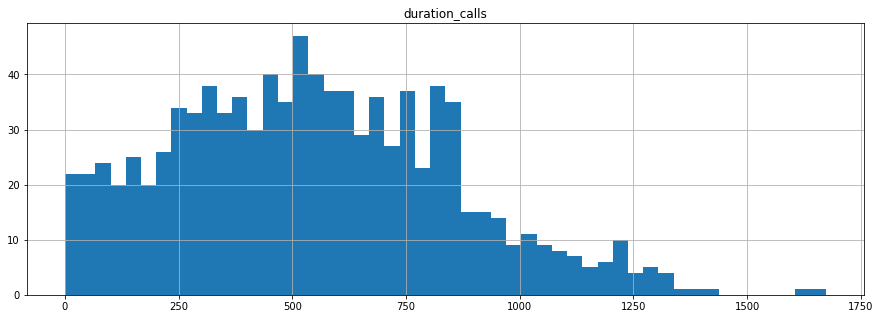

In [45]:
ultra.hist('duration_calls', bins=50, figsize=(15,5))

Можно заметить, что хотя среднее и медиана по звонкам находятся довольно близко, но все же среднее чуть выше медианы, и распределением слегка скошено вправо. Это значит, у нас есть клиенты с необыкновенно большим количеством звонков, но основная масса клиентов разговаривает до 750 минут месяц (при включенных в тариф 3000 минут).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fcb0a3150>]],
      dtype=object)

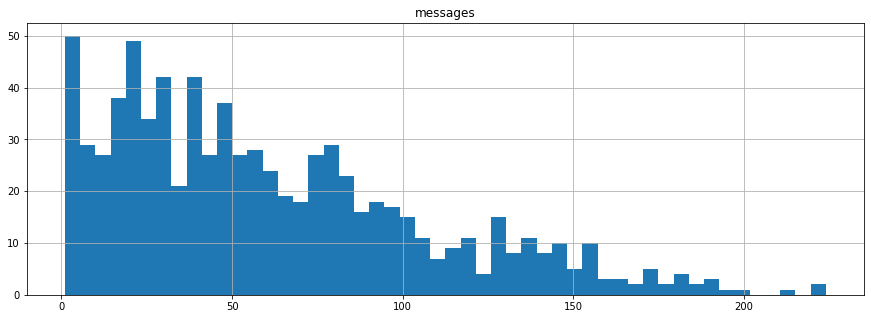

In [46]:
ultra.hist('messages', bins=50, figsize=(15,5))

По сообщениям тоже видим распределение, скошенное вправо, со средним в районе 60 сообщений в месяц и половина всех клиентов на тарифе "Ультра" отправляет в месяц 50 сообщений и меньше. По гистограмме видно, что у нас порядка 50 наблюдений, где отправили всего 1 смс за месяц.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fca909fd0>]],
      dtype=object)

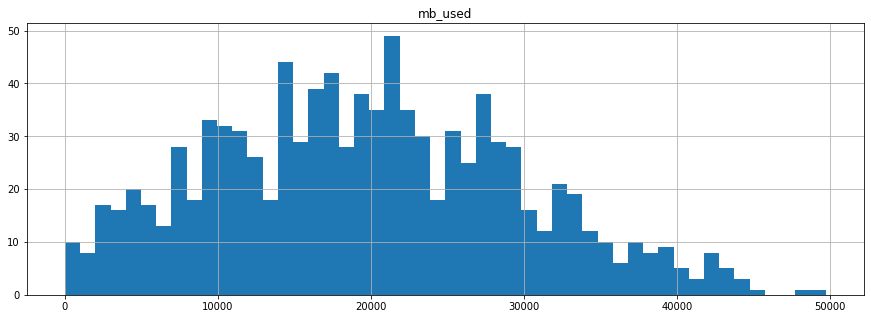

In [47]:
ultra.hist('mb_used', bins=50, figsize=(15,5))

По интернет трафику все не так печально, в среднем в месяц используют по 19 Гб (из включенных в тариф 30), и распределение тоже немного скошено вправо, т.к. есть выбивающиеся высокие значения до 48 Гб трафика в месяц.

- Теперь рассчитаем те же статистики для тарифа `smart` и построим гистограммы.

In [48]:
smart.describe()

,user_id,month,duration_calls,messages,mb_used
count,2229.000000,2229.000000,2223.000000,1922.000000,2228.000000
mean,1246.506505,8.346792,419.062978,38.716441,16215.661849
std,146.119496,2.920316,189.325618,26.787949,5861.736234
min,1001.000000,1.000000,0.000000,1.000000,0.000000
25%,1121.000000,6.000000,285.000000,17.000000,12649.272500
50%,1239.000000,9.000000,423.000000,34.000000,16507.740000
75%,1376.000000,11.000000,545.500000,55.000000,20043.792500
max,1499.000000,12.000000,1435.000000,143.000000,38552.450000


In [49]:
sm_var_calls = np.var(smart['duration_calls'], ddof=1)
sm_var_msgs = np.var(smart['messages'], ddof=1)
sm_var_mb = np.var(smart['mb_used'], ddof=1)

print('Тариф "Смарт"')
print('------------')
print('Дисперсия длительности звонков в месяц:', sm_var_calls)
print('Дисперсия количества сообщений в месяц:', sm_var_msgs)
print('Дисперсия использованного трафика в месяц:', sm_var_mb)

Тариф "Смарт"
------------
Дисперсия длительности звонков в месяц: 35844.1895513438
Дисперсия количества сообщений в месяц: 717.5942011753547
Дисперсия использованного трафика в месяц: 34359951.682283156


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fca800d50>]],
      dtype=object)

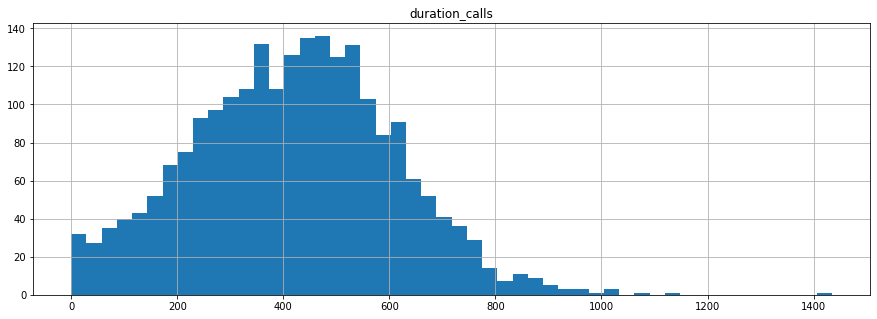

In [50]:
smart.hist('duration_calls', bins=50, figsize=(15,5))

Здесь распределение очень похоже на другой тариф, только чуть сдвинуто влево: в среднем на тарифе Смарт тратят около 400 минут в месяц, но есть и выбивающиеся очень высокие значения  - до 1400 минут, но таких единицы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fcc1ea7d0>]],
      dtype=object)

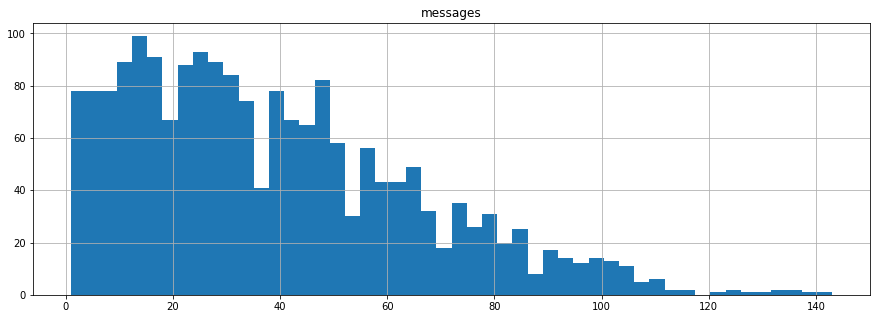

In [51]:
smart.hist('messages', bins=50, figsize=(15,5))

Здесь снова видим что подавляющее большинство пользователей отправляет очень мало сообщений: от 1 до 50 в месяц, но есть и длинный хвост справа и даже единичные значения выше 100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fca615210>]],
      dtype=object)

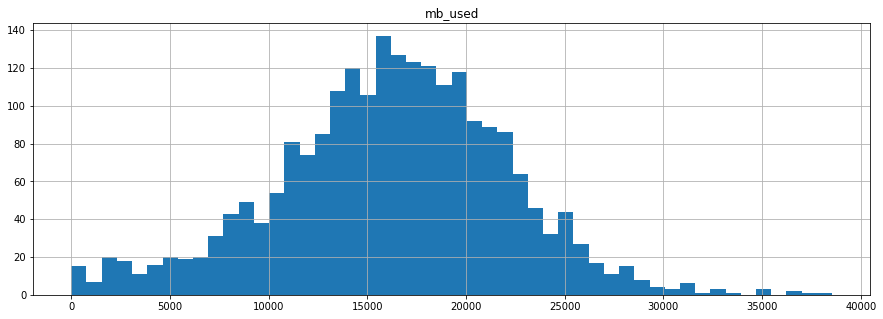

In [52]:
smart.hist('mb_used', bins=50, figsize=(15,5))

По интернет трафику распределение скошено отрицательно, но не сильно. 50% пользователей на тарифе Смарт используют до 16 Гб в месяц ( при включенных в тариф 15 Гб), т.е. у нас более половины пользователей доплачивают за интернет трафик сверх тарифа. Это хорошие новости для оператора.

**Вывод**

- Мы рассчитали статистики по минутам разговора, сообщениям и объему интернет-трафика на каждом из тарифов.
- Хотя форма распределения на обоих тарифах похожая, но есть и различия: во-первых, средние и медианы на тарифе Ультра выше, чем на Смарт; во-вторых, на тарифе Смарт больше пользователей, которым не хватает включенных в ежемесячную плату 15 Гб и они докупают еще.

## Проверка гипотез

### Различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»?

Нулевая гипотеза (Н0): средняя выручка пользователей тарифа Смарт равна средней выручке пользователей тарифа Ультра 
- `revenue(smart) == revenue(ultra)`

Альтернативная гипотеза (Н1): средняя выручка пользователей тарифа Смарт **не равна** средней выручке пользователей тарифа Ультра 
- `revenue(smart) != revenue(ultra)`

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод `scipy.stats.ttest_ind (array1, array2, equal_var)` . Так у нас нет оснований полагать, что выборки взяты из схожих по параметрам совокупностей (мы сравниваем 2 разных тарифа), то параметр equal_var в ttest зададим как False. Уровень alpha зададим 5%.

In [53]:
#делаем срезы выручки по каждому из тарифов
smart_revenue = df.query('tariff == "smart"')['revenue']
ultra_revenue = df.query('tariff == "ultra"')['revenue']

In [54]:
from scipy import stats as st
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    smart_revenue, 
    ultra_revenue,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.6264184497198272e-298
Отвергаем нулевую гипотезу



***Мы получили статистически значимый результат, который позволяет нам отвергнуть нулевую гипотезу о том, что средние выручки по тарифам Смарт и Ультра равны.***

Но как именно они различаются? Попробуем посчитать средние и стандартное отклонение по выборкам. Согласно центральной предельной теореме, так мы можем приблизительно оценить средние генеральных совокупностей (т.е. всех клиентов на тарифе "Смарт" и всех клиентов на тарифе "Ультра") 

In [55]:
smart_revenue.describe()

count    2229.000000
mean     1230.442346
std       785.720816
min       550.000000
25%       550.000000
50%       957.978516
75%      1665.488281
max      6699.775391
Name: revenue, dtype: float64


Средняя выручка за месяц на тарифе Смарт 1230 рублей. Но разброс значений довольно большой - от 550 до 6699 рублей за месяц. То есть у нас есть и такие клиенты, кто пользуется услугами по минимуму и укладывается в тариф, а есть такие, кто докупает очень много минут и трафика сверх абонентской платы.

In [56]:
ultra_revenue.describe()

count     985.000000
mean     2059.868918
std       354.880790
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4736.966309
Name: revenue, dtype: float64

**Вывод**

По тарифу Ультра мы видим, что среднее значение повыше: 2069 рублей, а вот разброс уже не такой значительный, максимальная выручка почти на 2000 рублей меньше, чем на Смарт. А 3/4 клиентов (3 квартиль) укладываются в месячные лимиты по тарифу и не доплачивают ничего сверху. 

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза (Н0): средняя выручка пользователей тарифа Смарт равна средней выручке пользователей тарифа Ультра 
- `revenue(moscow) == revenue(others)`

Альтернативная гипотеза (Н1): средняя выручка пользователей тарифа Смарт **не равна** средней выручке пользователей тарифа Ультра 
- `revenue(moscow) != revenue(others)`

Снова, применим метод `scipy.stats.ttest_ind (array1, array2, equal_var)` . Так у нас нет оснований полагать, что выборки взяты из схожих по параметрам совокупностей (мы делаем стратифицированные выборки по регионам), то параметр equal_var в ttest зададим как False. Уровень alpha пусть будет также 5%.

In [57]:
#делаем срезы выручки по каждому из тарифов
moscow = df.query('city == "Москва"')['revenue']
others = df.query('city != "Москва"')['revenue']

#проверяем гипотезу
results1 = st.ttest_ind(
    smart_revenue, 
    ultra_revenue,
    equal_var=False)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.6264184497198272e-298
Отвергаем нулевую гипотезу


***Так как p-value получилось меньше заданных 5%, то можно сделать вывод о значимом различии средней выручки в Москве и других регионах.***


Здравый смысл подсказывает, что в Москве расходы на связь будут выше, чем в других регионах: здесь выше уровень жизни, больше приезжих, которым нужно быть всегда на связи с родными, да и много других факторов.
    
Но попробуем оценить и сравнить (насколько возможно) выручку по Москве с регионами, рассчитав основные статистики по срезам.

In [58]:
moscow.describe()

count     611.000000
mean     1505.242461
std       738.889211
min       550.000000
25%       730.677734
50%      1699.357422
75%      1950.000000
max      5178.044922
Name: revenue, dtype: float64

In [59]:
others.describe()

count    2603.000000
mean     1479.801663
std       792.935275
min       550.000000
25%       687.518555
50%      1513.873047
75%      1950.000000
max      6699.775391
Name: revenue, dtype: float64

Опять видим максимальное значение 6699.775391, которое попало в регионы - это какой-то выброс, который путает нам средние. Если сравнить медианы, по Москве выручка **немного выше** - 1699 рублей, а в регионах - 1513 рублей. Межквартильный размах на обеих выборках одинаковый - от 550 до 1950 руб. 

**Вывод**
 Мы отвергнули обе нулевые гипотезы и сделали заключение о том, что:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
 Однако этого недостаточно, чтобы сказать, в какую сторону они отличаются.


## Заключение

- **В первой части проекта** мы рассмотрели исходные данные, оценили объемы датасетов и основные типы данных.


- **Во второй части** были проведены различные операции предобработки данных:
    1. Приведены все даты к типу данных `datetime`.
    2. Посчитаны и добавлены в общий датасет столбцы: 
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячная выручка с каждого пользователя.
    
    
- **В третьей части проекта** рассчитаны статистики по выборке и построены гисторгаммы.
    - Мы узнали, что в среднем на тарифе Смарт пользователям требуется 419 минут разговоров, 38 смс и 16 Гб интернет-трафика. Расход трафика в среднем превышает лимит, входящий в ежемесячный платеж, т.е. здесь оператор зарабатывает дополнительную выручку.
    - На тарифе Ультра - 545 минут, 61 смс и 19 Гб трафика, все средние в пределах лимитов по тарифу.


- **В четвертой части проекта** были выдвинуты и опровергнуты 2 гипотезы о средней выручке. Мы сделали выводы о том, что:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - выборочное среднее на тарифе "Ультра" выше, но разброс больше у "Смарт", и максимальная месячная выручка на "Смарт" почти на 2000 рублей выше.
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
    - судя только по выборкам, медиана выручки в Москве чуть выше, чем в остальных регионах вместе взятых.
    

 Изначально у нас был запрос от коммерческого департамента: понять, какой тариф приносит больше денег, чтобы скорректировать рекламный бюджет.  Мы оценили только основные статистики и разброс данных по двум тарифам и отвергли гипотезу о том, что средняя выручка на обоих тарифах одинаковая. Учитывая выводы из части 4.1, можно порекомендовать заложить больший бюджет на рекламу тарифа "Смарт". 
- Во-первых, он дешевле, а значит больше потенциал привлечь новых клиентов (которые сейчас, вполне возможно, пользуются другим оператором связи) или перевести уже существующих клиентов с других тарифов на "Смарт" как более выгодный. 
- Во-вторых, разброс значений по выручке на "Смарт" гораздо больше - есть те, кто укладывается в 550 рублей, но гораздо больше пользователей, кто доплачивает сверх месячного лимита за звонки и интернет-трафик, а значит здесь тоже хорошая возможность увеличения прибыли. Так, 75% клиентов фактически тратят в месяц до 1665 рублей, т.е. их перерасход сверх абонентской платы может составлять до 1100 рублей.
- В-третьих, учитывая небольшой объем выборки и ограниченность входных данных, мы не знаем, какую долю занимают пользователи тарифа "Ультра", но можно предположить, что и существующих, и потенциальных клиентов на него всегда будет приходиться меньше. Этот тариф значительно дороже, а значит подходит только для своей определенной ниши. К тому же мы увидели, что по звонкам и смс ни один пользователь фактически не превысил месячный лимит - никакой дополнительной прибыли оператору. Были перерасходы только по интернет-трафику, но на этом тарифе дополнительный Гб стоит на 50 рублей дешевле, чем на "Смарт".